# Exploratory Data Analysis

This notebook contains exploratory data analysis of Global Terrorism dataset from Kaggle


## Importing the data and required packages

In [24]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
# Importing the data 
data = pd.read_csv('../data/globalterrorism.csv', encoding='ISO-8859-1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
print(f"There are {len(data.columns)} columns in the dataset.")

There are 135 columns in the dataset.


There are too many columns in the dataset. So I selected some important columns to perform data analysis on them.

In [4]:
imp_cols = ["iyear", "imonth", "iday", "extended", "country_txt", "region_txt", 
           "city", "latitude", "longitude", "multiple", "success", "suicide", "gname", "nkill"]
print(f"Number of important columns: {len(imp_cols)}")

Number of important columns: 14


**Shape of the original dataset**

In [5]:
data.shape

(181691, 135)

### Data Reduction

In [6]:
# Transform the original dataframe
terror_data = data[imp_cols]
terror_data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'city', 'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'gname', 'nkill'],
      dtype='object')

**Informatice statistics of the dataset**

In [7]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   iday         181691 non-null  int64  
 3   extended     181691 non-null  int64  
 4   country_txt  181691 non-null  object 
 5   region_txt   181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   multiple     181690 non-null  float64
 10  success      181691 non-null  int64  
 11  suicide      181691 non-null  int64  
 12  gname        181691 non-null  object 
 13  nkill        171378 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 19.4+ MB


### Dataset Information

**iyear:** Year in which the incident has occurred\
**imonth:** month in which the incident has occurred\
**iday:** day in which the incident has occurred\
**extended:** Duration of the incident extended more than 24 hours\
**country_txt:** Identifies the country or location in which the event has occurred\
**region_txt:** Identifies the region in which the event has occurred\
**city:** Contains the name of the city, village or town in which the incident has occurred.\
**latitude:** Records the latitude of the incident location\
**longitude:** Records the longitude of the incident location\
**multiple:** Records whether the attack is a part of multiple attacks.\
**success:** Whether the attack was successful or not.\
**suicide:** Whether the attacker committed suicide or not.\
**nkill:** Number of kills in the incident.



### **Data Checks**

* Checking for missing values
* Checking for duplicate values
* Check datatypes
* Check for unique values in every column
* Check statistics of the given data


**Checking for missing values**

In [8]:
terror_data.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
city             434
latitude        4556
longitude       4557
multiple           1
success            0
suicide            0
gname              0
nkill          10313
dtype: int64

There are missing values present in our dataset

**Check for duplicated values**

In [9]:
terror_data.duplicated().sum()

20121

Our dataset is containing duplicate values. We have to remove them

**Remove duplicate values**

In [10]:
terror_data = terror_data.drop_duplicates()

In [11]:
terror_data.duplicated().sum()

0

Check for missing values as some duplicates values may also contain missing values

In [12]:
terror_data.isna().sum()

iyear             0
imonth            0
iday              0
extended          0
country_txt       0
region_txt        0
city            410
latitude       3924
longitude      3925
multiple          1
success           0
suicide           0
gname             0
nkill          8668
dtype: int64

Let's drop missing values. Imputing missing values may lead to reduction in data quality.

In [13]:
terror_data.dropna(inplace=True)

**Checking datateypes**

In [14]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149011 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        149011 non-null  int64  
 1   imonth       149011 non-null  int64  
 2   iday         149011 non-null  int64  
 3   extended     149011 non-null  int64  
 4   country_txt  149011 non-null  object 
 5   region_txt   149011 non-null  object 
 6   city         149011 non-null  object 
 7   latitude     149011 non-null  float64
 8   longitude    149011 non-null  float64
 9   multiple     149011 non-null  float64
 10  success      149011 non-null  int64  
 11  suicide      149011 non-null  int64  
 12  gname        149011 non-null  object 
 13  nkill        149011 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 17.1+ MB


**Check for unique values  in every column**

In [15]:
cat_df = terror_data.select_dtypes(exclude=['int', 'float'])
cat_df.nunique()

country_txt      202
region_txt        12
city           33795
gname           3360
dtype: int64

**Check the descriptive statistics of the dataset**


In [16]:
terror_data.describe()

,iyear,imonth,iday,extended,latitude,longitude,multiple,success,suicide,nkill
count,149011.000000,149011.000000,149011.000000,149011.000000,149011.000000,1.490110e+05,149011.000000,149011.000000,149011.000000,149011.000000
mean,2003.800109,6.479072,15.548872,0.038118,24.278308,-5.464599e+02,0.090376,0.879955,0.042252,2.572448
std,12.777277,3.388321,8.808600,0.191482,17.930900,2.232684e+05,0.286720,0.325015,0.201164,12.109563
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,0.000000,12.098045,9.174508e+00,0.000000,1.000000,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,0.000000,31.631083,4.389071e+01,0.000000,1.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.743578,6.938311e+01,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1570.000000


**Insights**
* This dataset contains records from year 1970 to 2017
* On average, 2 members are killed every attack.
* On average, 8 out of 10 attacks are succeeded.
* There is 40% chance that the attacker will attempt suicide.
* There is 0.01% chance that there will be another attack following the first attack

## Data Exploration

**Check for number of numerical and categorical columns in the dataset**

In [17]:
cat_features = terror_data.select_dtypes(include="object").columns
num_features = terror_data.select_dtypes(exclude="object").columns

print(f"Number of numerical columns: {len(num_features)}")
print(f"Number of categorical columns: {len(cat_features)}")

Number of numerical columns: 10
Number of categorical columns: 4


**Checking for categories in categorical columns**

In [18]:
cat_columns = list(cat_df.columns)

print(f"Categories in 'country_txt' :\n")
print(terror_data["country_txt"].unique())

print(f"Categories in 'region_txt': \n")
print(terror_data["region_txt"].unique())

print(f"Categories in 'city': ")
print(terror_data["city"].unique())

print(f"Categories in 'gname': ")
print(terror_data["gname"].unique())

Categories in 'country_txt' :

['Dominican Republic' 'Mexico' 'Philippines' 'United States' 'Uruguay'
 'Italy' 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland'
 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Japan' 'Ireland' 'Jordan'
 'Turkey' 'Paraguay' 'East Germany (GDR)' 'United Kingdom' 'Greece'
 'Nicaragua' 'Belgium' 'Netherlands' 'Canada' 'Iran' 'Australia'
 'Pakistan' 'Spain' 'Ethiopia' 'Sweden' 'South Yemen' 'Cambodia' 'Israel'
 'Poland' 'Taiwan' 'Panama' 'West Bank and Gaza Strip' 'India' 'Austria'
 'France' 'South Vietnam' 'Colombia' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Afghanistan' 'Peru'
 'Chile' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Zambia' 'Malaysia'
 'Bolivia' 'Singapore' 'Botswana' 'Kuwait' 'Jamaica' 'Chad' 'North Yemen'
 'Syria' 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya'
 'Iraq' 'Somalia' 'Sri Lanka' 'Namibia' 'Bahamas' 'Nigeria' 'Barbados'
 'Costa Rica

In [19]:
terror_data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,multiple,success,suicide,gname,nkill
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,1,0,MANO-D,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0.0,1,0,23rd of September Communist League,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0.0,1,0,Unknown,1.0
5,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0.0,1,0,Black Nationalists,0.0
6,1970,1,2,0,Uruguay,South America,Montevideo,-34.891151,-56.187214,0.0,0,0,Tupamaros (Uruguay),0.0


## Data Visualization

### Univariate Analysis

#### `iyear` column

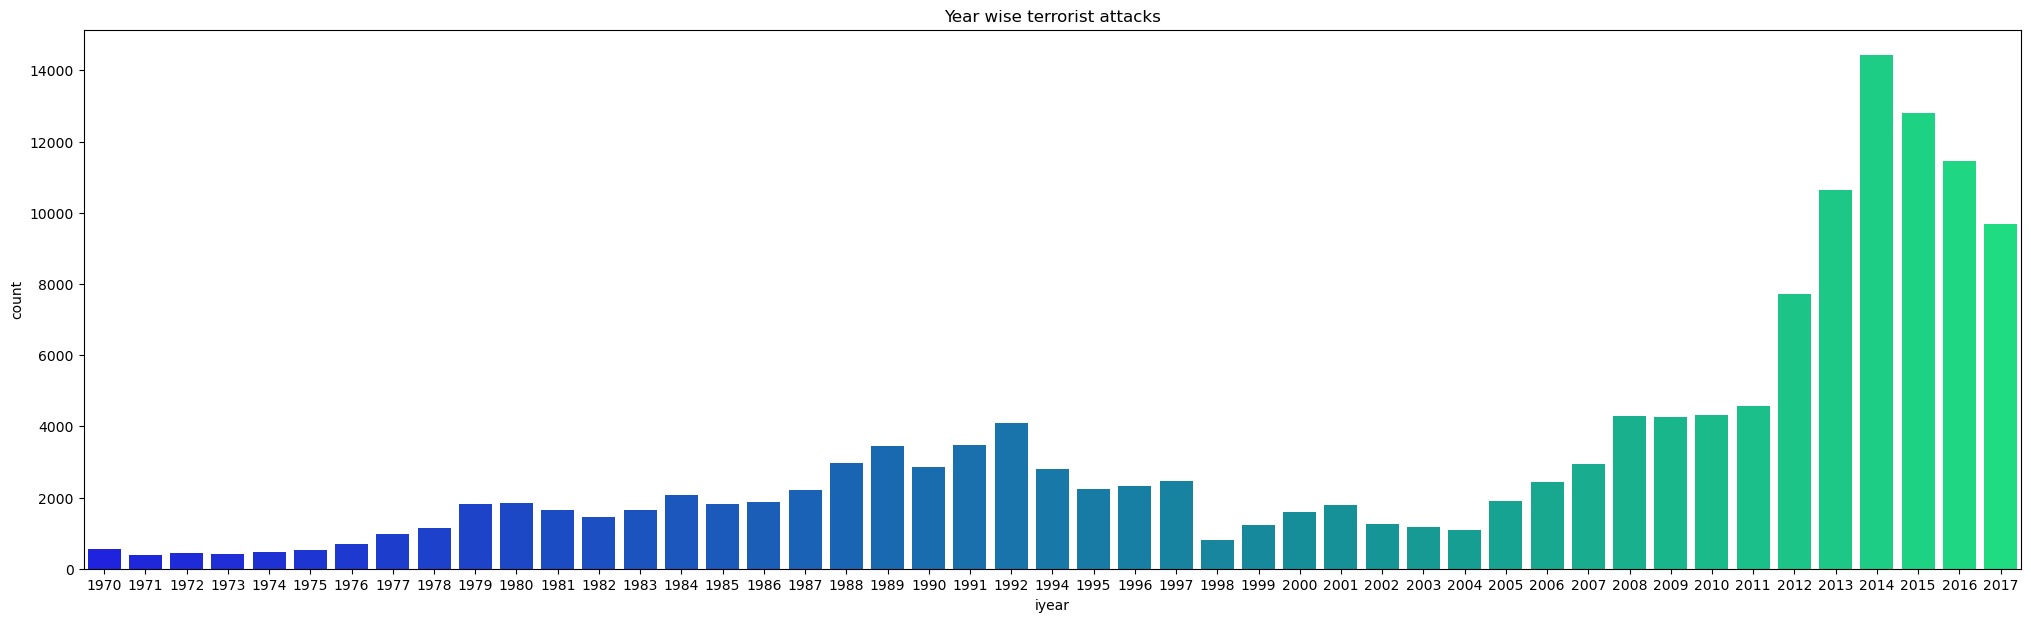

In [35]:
plt.figure(figsize=(25, 7))
sns.countplot(x=terror_data["iyear"], palette='winter')
plt.title('Year wise terrorist attacks')
plt.show()

**Insights:**
- It can be inferred from the plot that there has been a significant increase in terror attacks since the year 2012
- 2017 saw the highest number of terrorist attacks.
- The year that had the least amount of terrorist attacks was 1970.

#### `imonth` column

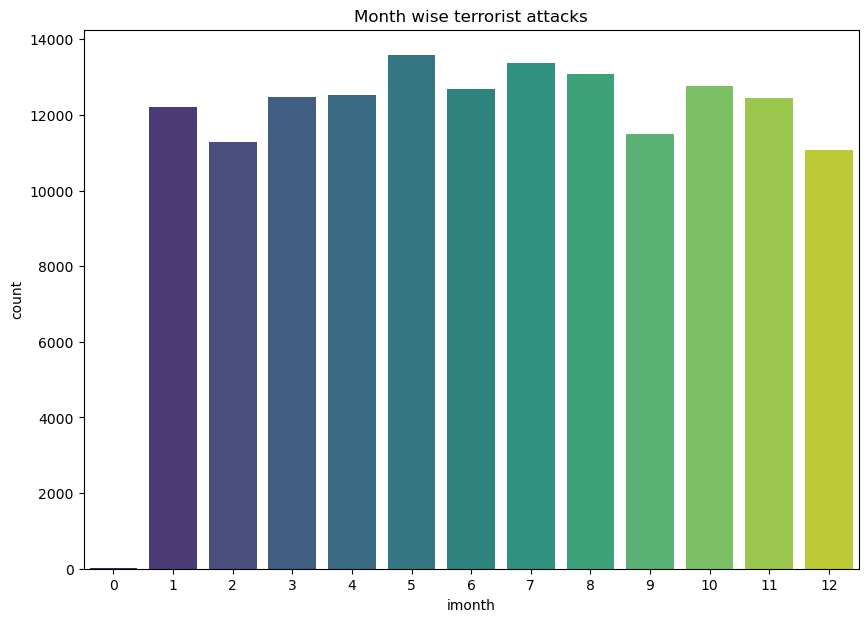

In [40]:
sns.countplot(x=terror_data["imonth"], palette="viridis")
plt.title("Month wise terrorist attacks")
plt.show()

**Insights:**
- There is no relationship between the month and the number of terrorist attacks